In [13]:
import sys
import os
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/results/ridge/acc/'
import classification

#SS
SS=pd.read_csv(outDir+'SS/folds/allFolds.csv')
BS=pd.read_csv(outDir+'BS/folds/allFolds.csv')
#motor
SS_motor=SS[SS.train=='motor'].acc.values
BS_motor=BS[BS.train_task=='motor'].acc.values

#mixed
SS_mixed=SS[SS.train=='mixed'].acc.values
BS_mixed=BS[BS.train_task=='mixed'].acc.values

#memory
SS_mem=SS[SS.train=='mem'].acc.values
BS_mem=BS[BS.train_task=='mem'].acc.values


#DS
DS=pd.read_csv(outDir+'DS/folds/allFolds.csv')
#CV
CV=pd.read_csv(outDir+'CV/reformedFolds.csv')
#motor
DS_motor=DS[DS.task=='Motor'].acc.values
CV_motor=CV[CV.task=='Motor'].acc.values

#mixed
DS_mixed=DS[DS.task=='Mixed'].acc.values
CV_mixed=CV[CV.task=='Mixed'].acc.values

#memory
DS_mem=DS[DS.task=='Memory'].acc.values
CV_mem=CV[CV.task=='Memory'].acc.values


In [51]:
stats.ttest_ind(SS_motor, BS_motor, equal_var = False)

stats.ttest_ind(SS_mixed, BS_mixed, equal_var = False)

stats.ttest_ind(SS_mem, BS_mem, equal_var = False)

Ttest_indResult(statistic=4.378975855773864, pvalue=1.8125319013851326e-05)

In [69]:
#motor train, mem test
SS_motorMem=SS[(SS['train']=='motor') & (SS['test']=='mem')].acc.values
BS_motorMem=BS[(BS['train_task']=='motor') & (BS['test_task']=='mem')].acc.values
#motor train mix test
SS_motorMix=SS[(SS['train']=='motor') & (SS['test']=='mixed')].acc.values
BS_motorMix=BS[(BS['train_task']=='motor') & (BS['test_task']=='mixed')].acc.values

#mixed train, mem test
SS_mixMem=SS[(SS['train']=='mixed') & (SS['test']=='mem')].acc.values
BS_mixMem=BS[(BS['train_task']=='mixed') & (BS['test_task']=='mem')].acc.values
#mixed train motor test
SS_mixMotor=SS[(SS['train']=='mixed') & (SS['test']=='motor')].acc.values
BS_mixMotor=BS[(BS['train_task']=='mixed') & (BS['test_task']=='motor')].acc.values

#memory train, mix test
SS_memMix=SS[(SS['train']=='mem') & (SS['test']=='mixed')].acc.values
BS_memMix=BS[(BS['train_task']=='mem') & (BS['test_task']=='mixed')].acc.values
#memory train motor test
SS_memMotor=SS[(SS['train']=='mem') & (SS['test']=='motor')].acc.values
BS_memMotor=BS[(BS['train_task']=='mem') & (BS['test_task']=='motor')].acc.values


In [75]:
stats.ttest_ind(SS_motorMem, BS_motorMem, equal_var = False)


Ttest_indResult(statistic=0.9487127757648736, pvalue=0.34477658986204773)

In [74]:
stats.ttest_ind(SS_motorMix, BS_motorMix, equal_var = False)

Ttest_indResult(statistic=-0.34990584198770214, pvalue=0.7270597682875242)

In [76]:
stats.ttest_ind(SS_mixMem, BS_mixMem, equal_var = False)

Ttest_indResult(statistic=19.82408262471779, pvalue=1.851419802044856e-48)

In [77]:
stats.ttest_ind(SS_mixMotor, BS_mixMotor, equal_var = False)

Ttest_indResult(statistic=17.791152999069528, pvalue=3.623471345430174e-39)

In [78]:
stats.ttest_ind(SS_memMix, BS_memMix, equal_var = False)

Ttest_indResult(statistic=2.4830770282481436, pvalue=0.014380103556397805)

In [79]:
stats.ttest_ind(SS_memMotor, BS_memMotor, equal_var = False)

Ttest_indResult(statistic=3.826524046275118, pvalue=0.00021511136616734808)

ValueError: could not convert string to float: 'MSC01'

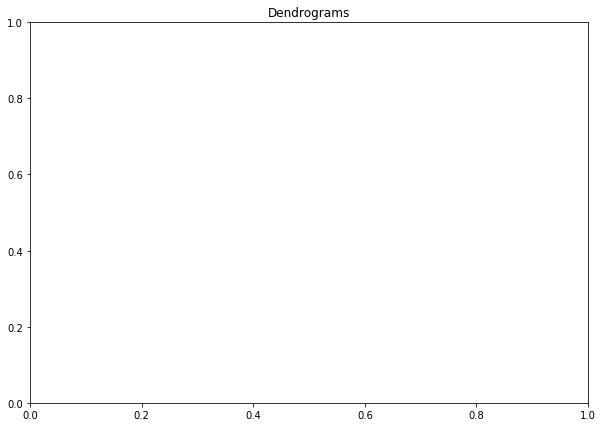

In [6]:
#hierarchical clustering tutorial
from sklearn.preprocessing import normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#data_scaled = normalize(DS)
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(DS, method='ward'))

In [13]:
motor=DS.loc[DS['task'] == 'Motor']
mem=DS.loc[DS['task'] == 'Memory']
mix=DS.loc[DS['task'] == 'Mixed']

In [20]:
mix.set_index('test',inplace=True)
mix.drop(columns='task',inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
#mix.pivot_table(index='test',columns='train',values='acc')

In [15]:
stats.ttest_ind(DS_motor, CV_motor, equal_var = False)

Ttest_indResult(statistic=-18.00649888143028, pvalue=8.148435237572736e-30)

In [16]:
stats.ttest_ind(DS_mixed, CV_mixed, equal_var = False)

Ttest_indResult(statistic=-22.12612853158213, pvalue=1.0745318166522145e-35)

In [17]:
stats.ttest_ind(DS_mem, CV_mem, equal_var = False)

Ttest_indResult(statistic=-15.852835751851044, pvalue=2.1359668634679154e-26)

In [23]:
CV_stats=pd.read_csv(outDir+'CV/stats.csv')
DS_stats=pd.read_csv(outDir+'DS/stats.csv')